## Windowed DFA

In [detrended fluctuation analysis](dfaAnalysis.ipynb) we learnt how to run DFA. In this section, we'll focus on performing a windowed version of DFA. This allows you to assess changes in the patterning of behavioural variability over the course of a time series. By breaking the time series down into small overlapping segments (or 'windows') you can capture changes in the system's behaviour that a full time-series analysis might miss.

#### Selecting the Window Size and Overlap

To perform windowed RQA, we need to select the following:
- Window size: This specifies the number of samples you wish to include in each window. 
- Overlap: This is the degree of overlap between windows, often expressed as a percentage (e.g., 50% overlap). 

For DFA, the window size needs to be a power of 2 (e.g., 512, 1024, 2048), with a minimum window size of 512. In addition, we want to consider the specific dynamics being studied,the length of the time series, and the sample rate. For example, if you have 5 minutes of gaze data sampled at 50 Hz (i.e., 50 samples per second), and you want to assess 𝛼 for 20-second intervals approximately, you would select a window size of 1024 samples. 

#### Let's Practice Running windowed DFA
Before we begin, we need to import and load various packages and utilities. These will allow us to import the data, manipulate it, run DFA, and create visualisations to explore our results.

The code below will do all the setup for you. Simply click the "play" button on the left to run the code, and we'll be ready to start our analysis.


In [1]:
import os
import pandas as pd
from utils import filter_data, interpolate_missing_data
from utils.dfa_utils import perform_dfa_for_plotting
from utils.plot_utils import plot_ts_and_dfa

C:\Users\MQ20188409\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pytools\persistent_dict.py:59: UserWarning: Unable to import recommended hash 'siphash24.siphash13', falling back to 'hashlib.sha256'. Run 'python3 -m pip install siphash24' to install the recommended hash.
  warn("Unable to import recommended hash 'siphash24.siphash13', "


Now that all the utilities are loaded, it's time to apply DFA to some real data — in this case, [postural sway data](data/dfa/postureA.txt). This data was also used previously in the [DFA](dfaAnalysis.ipynb) section. As such, you can compare those results to understand how a windowed analysis differs from non-windowed DFA.

For our DFA, we need to select an appropriate window size. The posture data was sampled at 50 Hz (i.e., 50 times per second), and the time series is just under 2 minutes long (i.e., 5622 samples). Let's set a window size that corresponds to approximately 15s. As the window size needs to be a power of 2, we'll select 1024. We'll also set the overlap between consecutive windows to 50%, meaning that each window overlaps the next by 7.5s. 

Click the "play" button below to perform the analysis and generate the visualisations.

Loading file: postureA.txt


c:\Users\MQ20188409\OneDrive - Macquarie University\Github repos\Linear-NonLinear-TSAnalysis\utils\dfa_utils.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = (data[column] - data[column].mean()) / data[column].std()


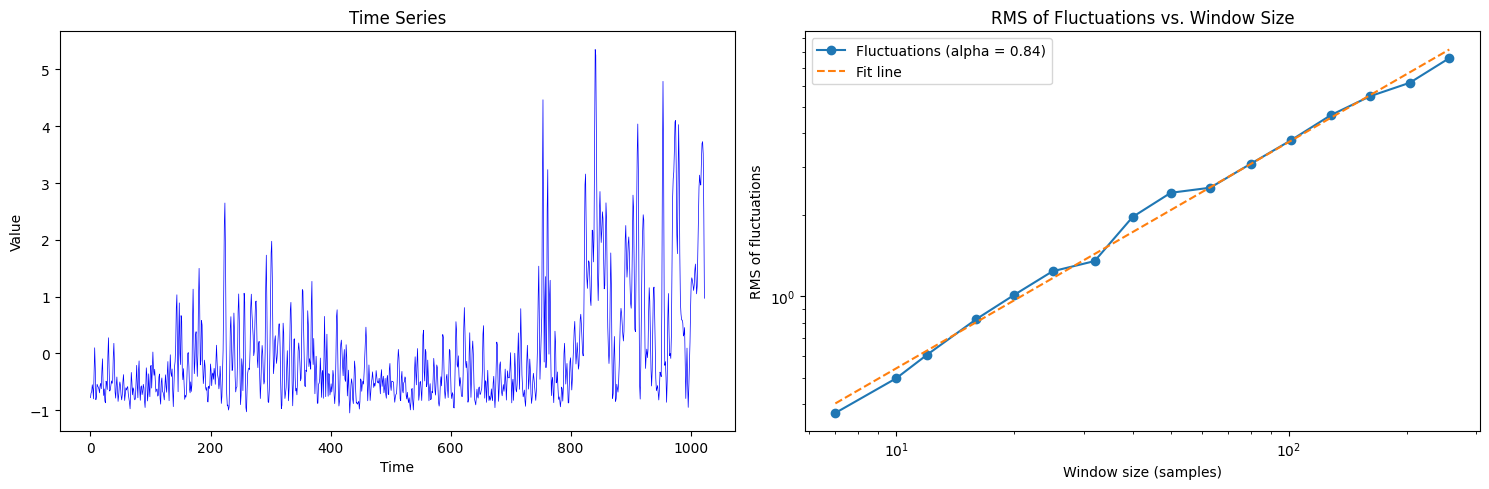

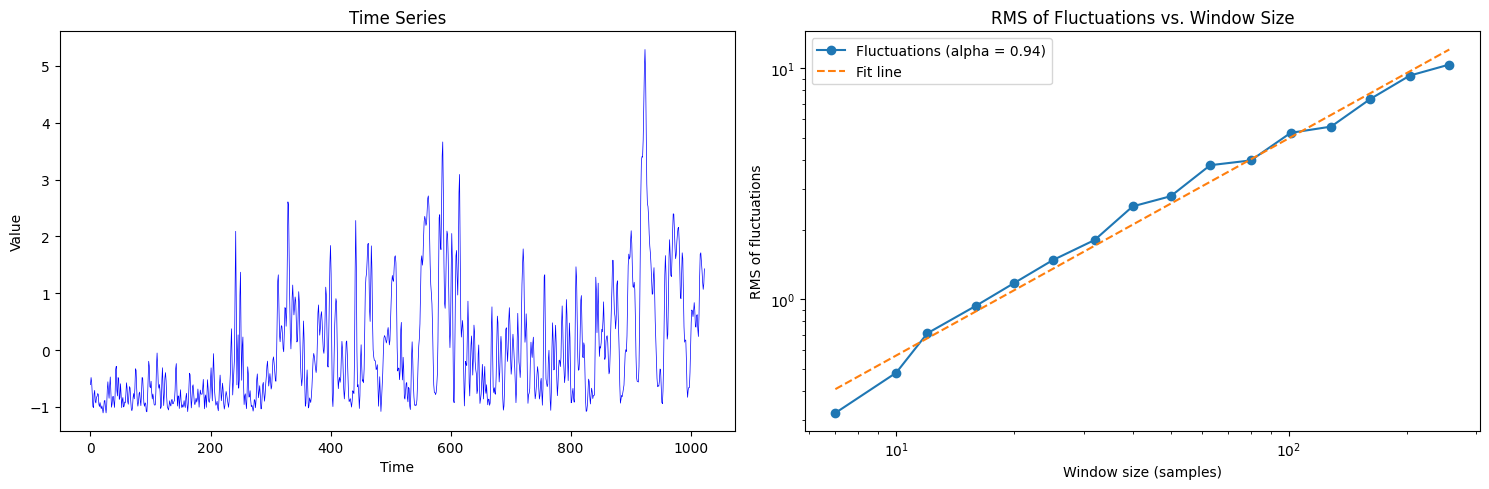

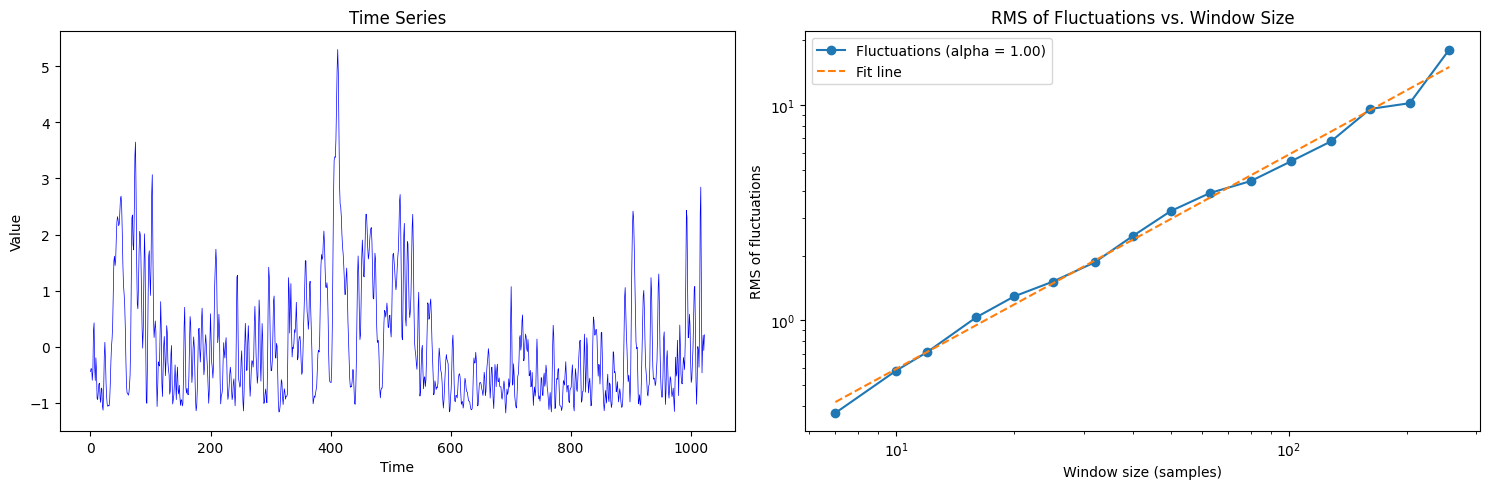

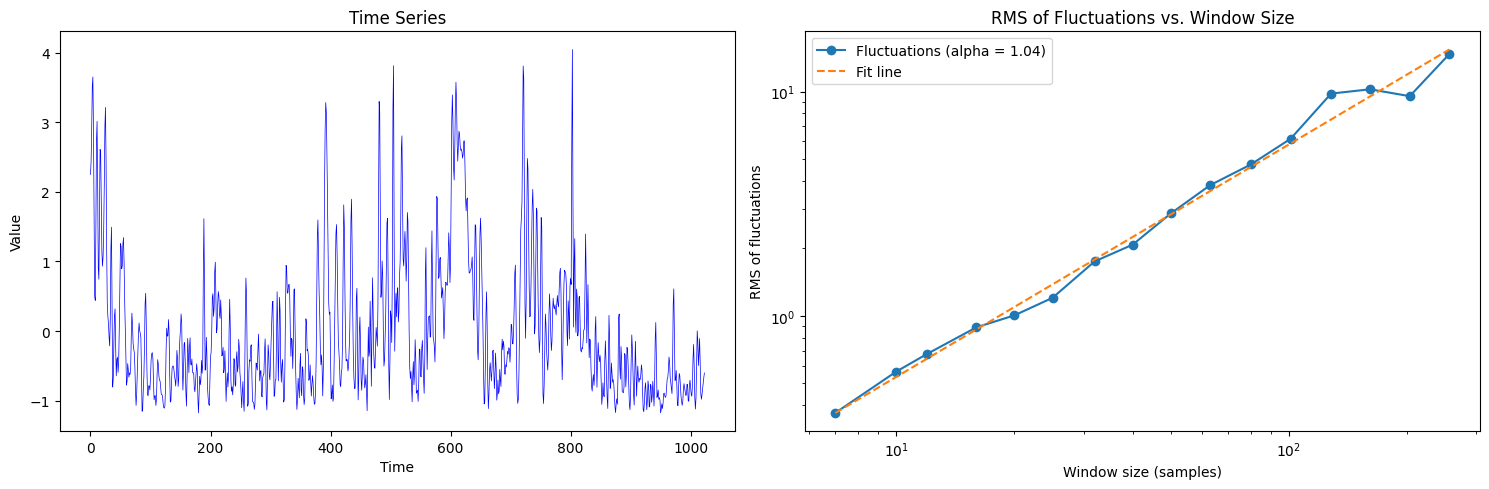

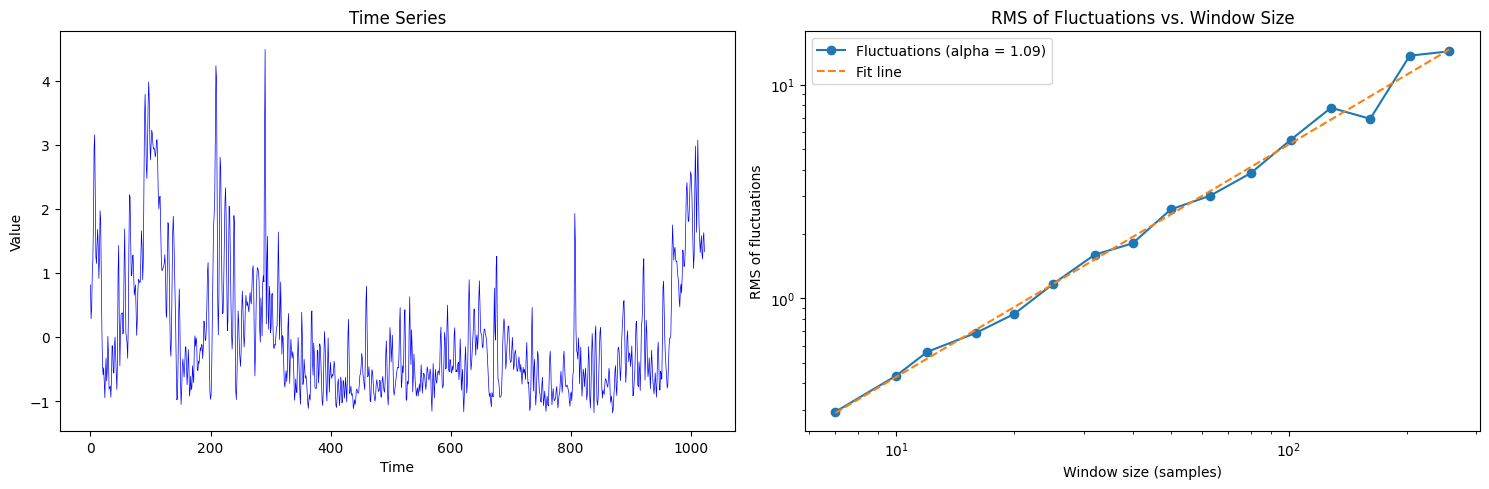

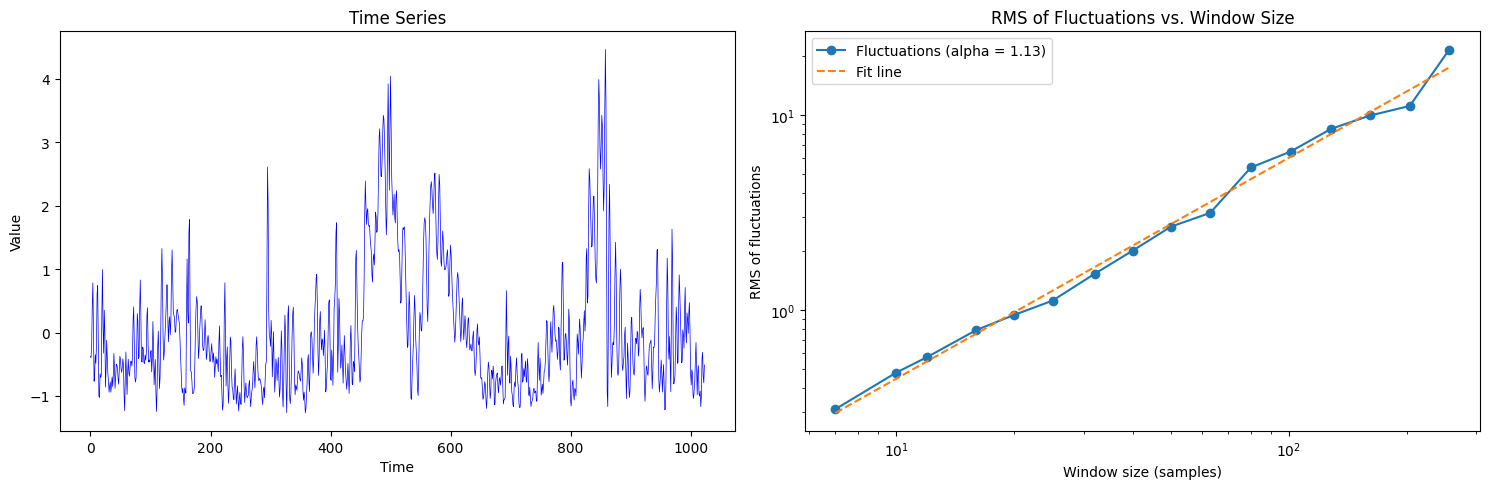

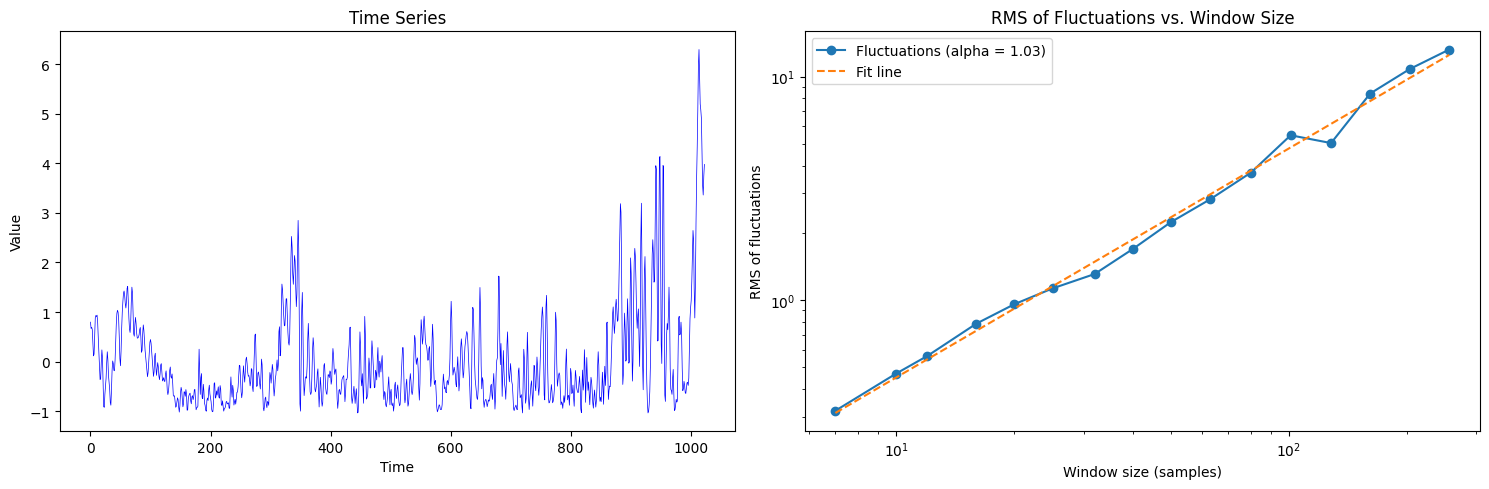

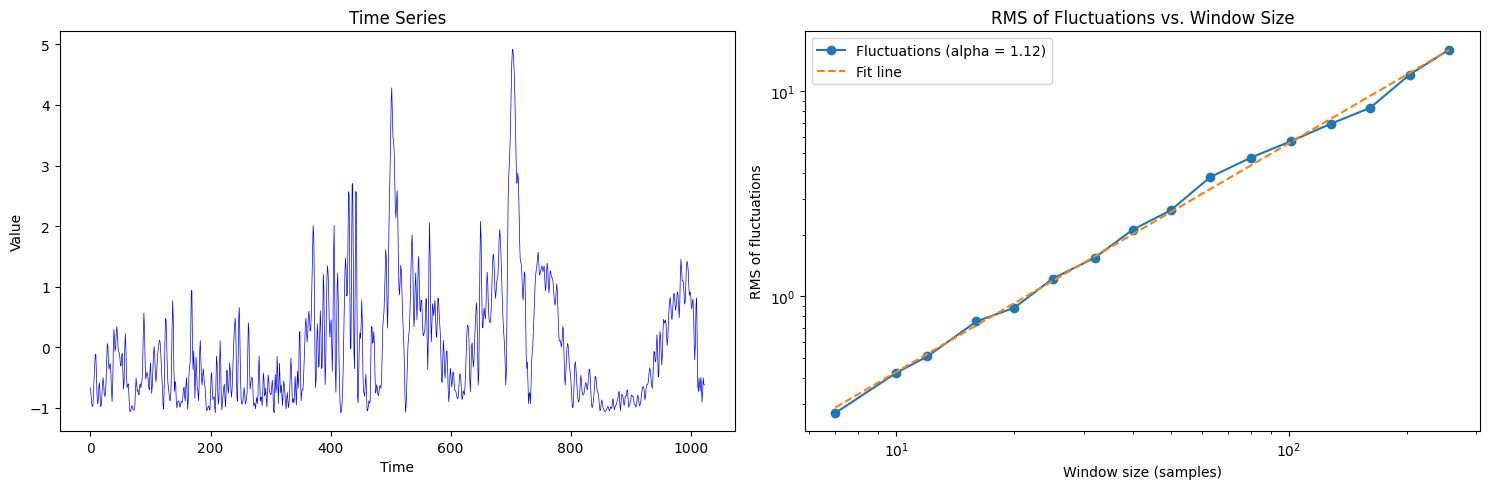

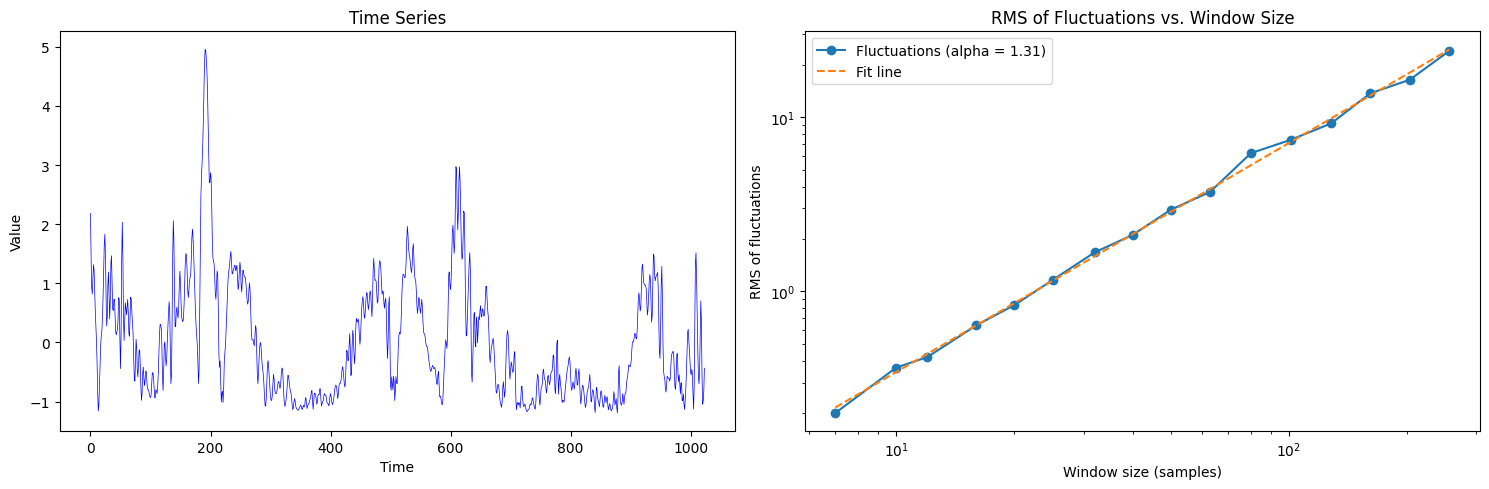

Windowed DFA analysis and plotting completed successfully!


In [3]:
# First set the directory path for the data
data_directory = "data/dfa/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file name for the data
file_name = "postureA.txt"
file_path = os.path.join(data_directory, file_name)

# Check whether the file containing the data exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the CSV file into a DataFrame
    data = pd.read_csv(file_path, header=None, sep='\t')

    # Interpolate any missing data that might be present in the file
    data = interpolate_missing_data(data)

    # Apply a filter to the data
    data = filter_data(data)
    
    # Normalise the data by using a z-score
    data = (data - data.mean()) / data.std()

    # Define window size and overlap
    window_size = 1024
    overlap = 0.5
    step_size = int(window_size * (1 - overlap))

    # Perform windowed DFA analysis
    for start in range(0, len(data) - window_size + 1, step_size):
        end = start + window_size
        window_data = data.iloc[start:end]

        # Perform DFA analysis using the perform_dfa_for_plotting function from dfa_utils
        dfa_results = perform_dfa_for_plotting(window_data)

        # Plot time series and DFA results side-by-side
        for column, results in dfa_results.items():
            alpha = results['alpha']
            scales = results['scales']
            flucts = results['flucts']
            fit_line = results['fit_line']

            # Plotting code
            plot_filename = f'images/dfa/{file_name}_dfa_{column}_window_{start}_{end}_plot.png'
            plot_ts_and_dfa(window_data[column].values, scales, flucts, fit_line, alpha, save_image, plot_filename)

    print('Windowed DFA analysis and plotting completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')

#### Interpreting the Results

If your code ran successfully, you should see a series of plots with alpha values largely rising over time (i.e., becoming more persistent over the course of the trial).

Now let's see how this metrics compare to a different person's postural sway. Click "play" on the code chunk before to run DFA on another signal, and observe the differences.

Loading file: postureA.txt
Alpha value for column 0: 1.05345519395443


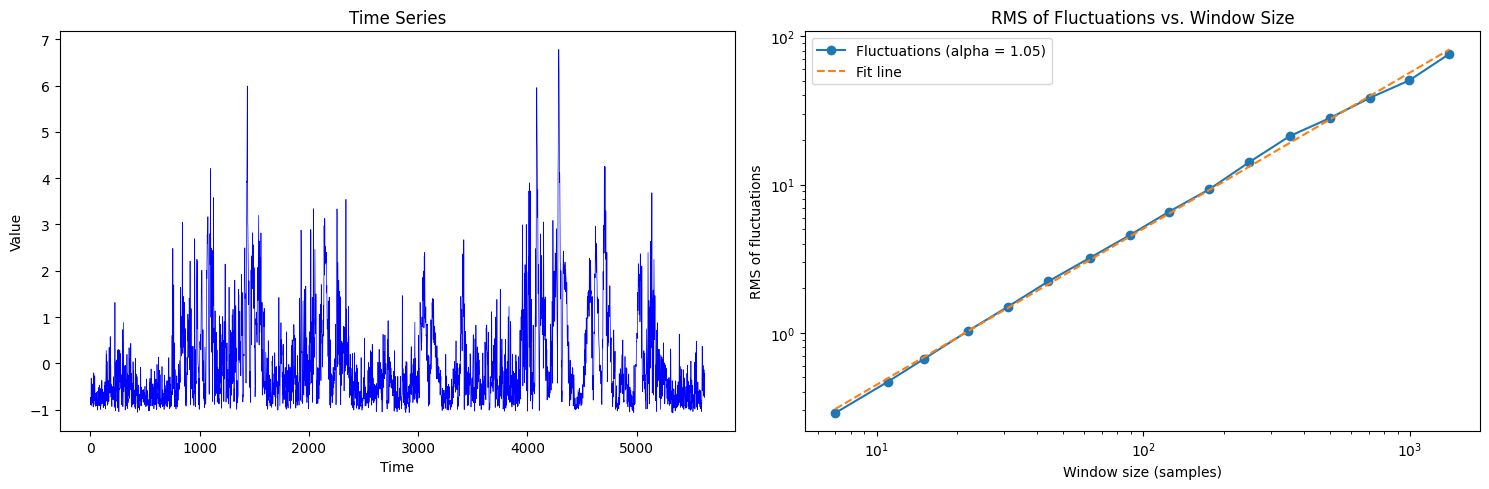

DFA analysis and plotting completed successfully!
Loading file: postureB.txt
Alpha value for column 0: 0.8932897800492342


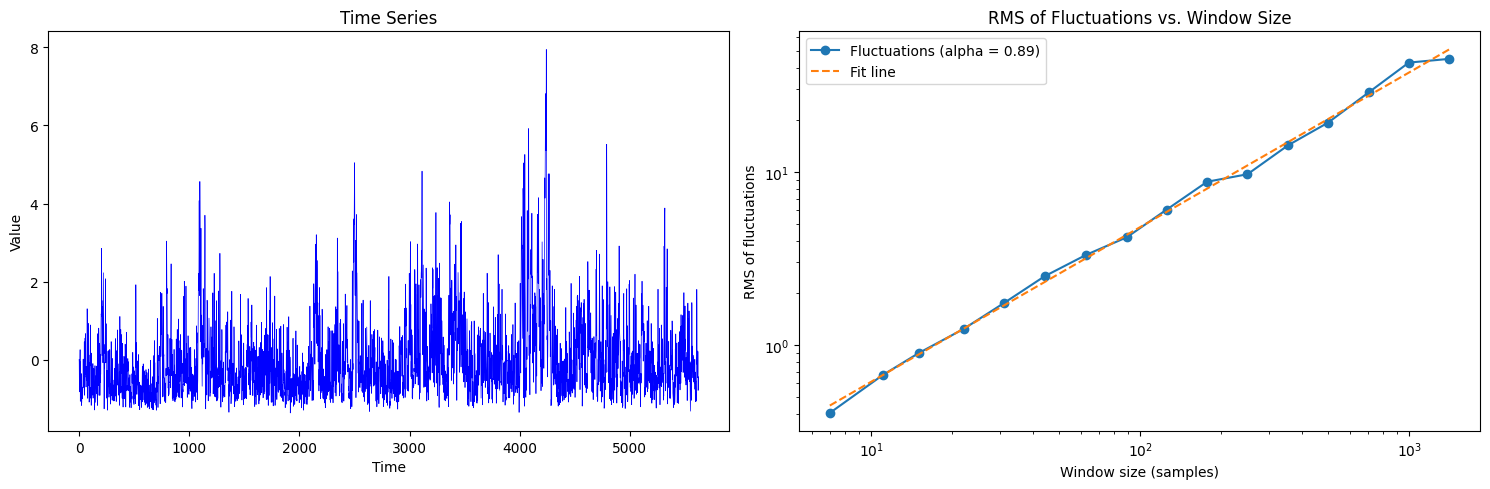

DFA analysis and plotting completed successfully!


In [4]:
# First set the directory path for the data
data_directory = "data/dfa/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file names for the data
file_names = ["postureA.txt", "postureB.txt"]

# Loop through each file for analysis
for file_name in file_names:
    file_path = os.path.join(data_directory, file_name)

    # Check whether the file containing the data exists
    if os.path.exists(file_path):
        print(f'Loading file: {file_name}')

        # Load the CSV file into a DataFrame
        data = pd.read_csv(file_path, header=None, sep='\t')

        # Interpolate any missing data that might be present in the file
        data = interpolate_missing_data(data)

        # Apply a filter to the data
        data = filter_data(data)
        
        # Normalise the data by using a z-score
        data = (data - data.mean()) / data.std()

        # Perform DFA analysis using the perform_dfa_for_plotting function from dfa_utils
        dfa_results = perform_dfa_for_plotting(data)

        # Plot time series and DFA results side-by-side
        for column, results in dfa_results.items():
            print(f'Alpha value for column {column}: {results["alpha"]}')
            alpha = results['alpha']
            scales = results['scales']
            flucts = results['flucts']
            fit_line = results['fit_line']

            # Plotting code (assuming a plot function is available)
            plot_filename = f'images/dfa/{file_name}_dfa_{column}_plot.png'
            plot_ts_and_dfa(data[column].values, scales, flucts, fit_line, alpha, save_image, plot_filename)

        print('DFA analysis and plotting completed successfully!')
    else:
        print(f'File {file_name} not found in directory {data_directory}')

#### Comparing the Results

If you examine the plots and the resulting alpha, you'll notice that the second participant's postural sway is less persistent than the first (i.e., closer to white noise).

#### Going Further

To expand your understanding of DFA, you can try the following:

1. Analyse other time series: Repeat the analyses above with other types of continuous data such as [walking](data/dfa/Gait1.txt).
2. Run a windowed DFA: To assess how patterns of behavioural variability change over time, explore [dfaWindowed.ipynb](dfaWindowed.ipynb) which walks you through performing windowed DFA.
3. Explore complexity matching: Fractal scaling in human behavioural time series has been shown to algin with an interaction partner. Explore different ways to quantify complexity matching by heading to [complexitymatching.ipynb](complexitymatching.ipynb).